In [37]:
!pip install ucimlrepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_wine, load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc


from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# **Random Forest Classifier**

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 20, random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 111   0   1   0   0   0   0   0   1]
 [  0   0 110   1   0   0   0   1   0   0]
 [  0   0   2 108   0   0   0   0   0   3]
 [  0   0   0   0  97   0   0   0   0   3]
 [  0   0   0   1   1 116   0   0   1   2]
 [  0   1   0   0   1   0 120   0   0   0]
 [  0   0   0   0   2   0   0 120   0   0]
 [  0   0   1   0   0   0   1   1  93   2]
 [  0   0   0   3   1   0   0   1   1  87]]
---------------------------------
---------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       0.99      0.98      0.99       113
           2       0.97      0.98      0.98       112
           3       0.95      0.96      0.95       113
           4       0.95      0.97      0.96       100
           5       1.00      0.96      0.98       121
           6       0.99      0.98      0.99       122
           7       0.98   

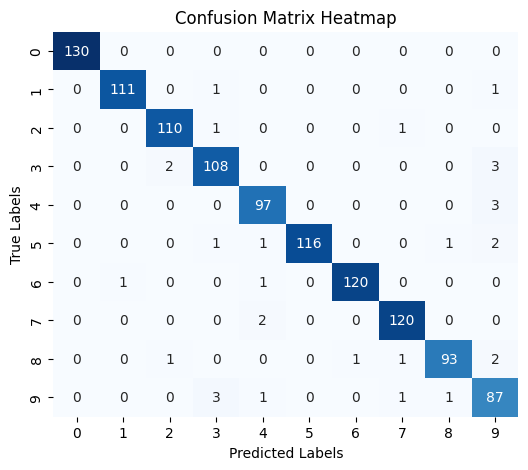

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("---------------------------------")
print("---------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

print("---------------------------------")
print("---------------------------------")

print("Accuracy:")
print(accuracy_score(y_test, y_pred))
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# **Support Vector Machine(SVM)**

In [7]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 110   0   0   0   0   0   0   1   2]
 [  0   0 111   0   0   0   1   0   0   0]
 [  0   0   0 112   0   0   0   0   1   0]
 [  0   0   0   0  99   0   0   0   0   1]
 [  0   0   0   2   0 119   0   0   0   0]
 [  0   1   0   0   2   0 119   0   0   0]
 [  0   0   0   0   0   0   0 122   0   0]
 [  0   2   0   0   1   0   1   0  93   1]
 [  0   1   0   1   0   1   0   0   0  90]]
---------------------------------
---------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       0.96      0.97      0.97       113
           2       1.00      0.99      1.00       112
           3       0.97      0.99      0.98       113
           4       0.97      0.99      0.98       100
           5       0.99      0.98      0.99       121
           6       0.98      0.98      0.98       122
           7       1.00   

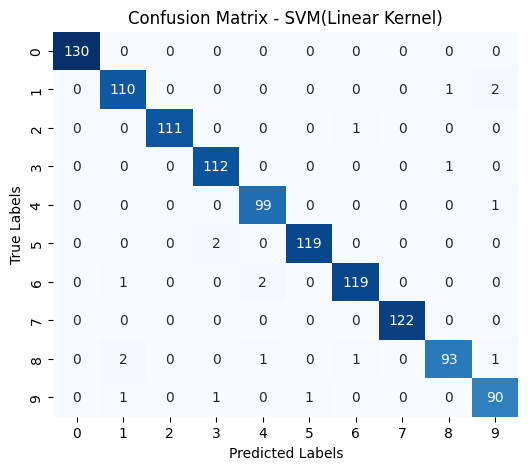

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("---------------------------------")
print("---------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM(Linear Kernel)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[129   0   0   0   0   0   0   0   1   0]
 [  0 113   0   0   0   0   0   0   0   0]
 [  0   0 112   0   0   0   0   0   0   0]
 [  0   0   0 111   0   0   0   0   2   0]
 [  0   0   0   0  96   0   0   0   0   4]
 [  0   0   0   1   0 117   0   0   1   2]
 [  0   1   0   0   0   0 120   0   1   0]
 [  0   0   0   0   0   0   0 122   0   0]
 [  0   0   0   0   0   0   0   0  98   0]
 [  0   0   0   0   1   0   2   0   0  90]]
---------------------------------
---------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       130
           1       0.99      1.00      1.00       113
           2       1.00      1.00      1.00       112
           3       0.99      0.98      0.99       113
           4       0.99      0.96      0.97       100
           5       1.00      0.97      0.98       121
           6       0.98      0.98      0.98       122
           7       1.00   

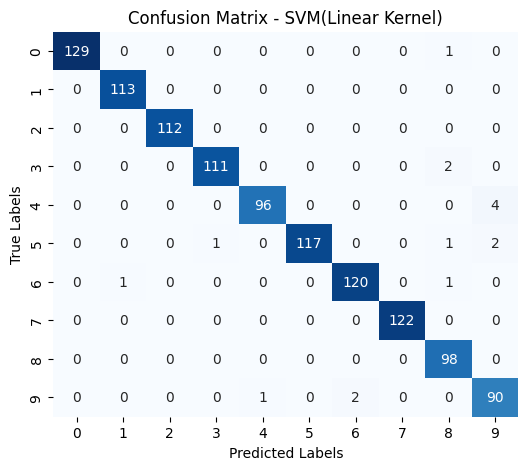

In [9]:
#Parameter tuning of SVM
from sklearn.svm import SVC

classifier = SVC(kernel = 'poly', degree=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("---------------------------------")
print("---------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM(Linear Kernel)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 113   0   0   0   0   0   0   0   0]
 [  0   0 112   0   0   0   0   0   0   0]
 [  0   0   0 113   0   0   0   0   0   0]
 [  0   0   0   0  98   0   0   0   0   2]
 [  0   0   0   1   0 119   0   1   0   0]
 [  0   1   0   0   1   0 120   0   0   0]
 [  0   0   0   0   1   0   0 121   0   0]
 [  0   0   1   0   0   0   0   0  96   1]
 [  0   0   0   0   1   0   1   0   0  91]]
---------------------------------
---------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       0.99      1.00      1.00       113
           2       0.99      1.00      1.00       112
           3       0.99      1.00      1.00       113
           4       0.97      0.98      0.98       100
           5       1.00      0.98      0.99       121
           6       0.99      0.98      0.99       122
           7       0.99   

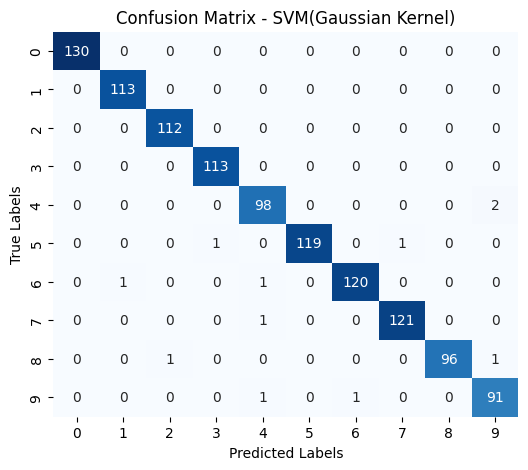

In [10]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf') #Gaussian Kernel
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("---------------------------------")
print("---------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM(Gaussian Kernel)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0  99   9   0   0   0   0   0   3   2]
 [  0   1 109   0   0   2   0   0   0   0]
 [  0   1   2 109   0   0   0   0   0   1]
 [  0   3   0   0  91   0   0   3   1   2]
 [  0   0   1   3   0 113   0   3   0   1]
 [  0   1   0   0   2   0 119   0   0   0]
 [  0   1   0   1   5   0   0 115   0   0]
 [  0   6   0   0   1   1   1   0  89   0]
 [  0   2   0   0   1   1   0   4   0  85]]
---------------------------------
---------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       0.87      0.88      0.87       113
           2       0.90      0.97      0.94       112
           3       0.96      0.96      0.96       113
           4       0.91      0.91      0.91       100
           5       0.97      0.93      0.95       121
           6       0.99      0.98      0.98       122
           7       0.92   

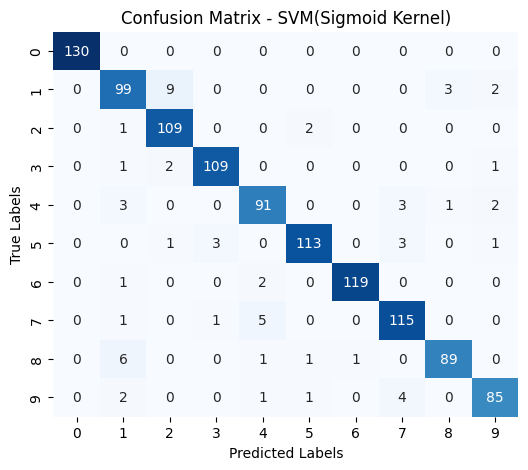

In [11]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'sigmoid') #Sigmoid Kernel
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("---------------------------------")
print("---------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM(Sigmoid Kernel)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Confusion Matrix:
[[129   0   0   0   0   0   0   0   0   1]
 [  0  69   0   4   5   4   0   1  30   0]
 [  2   6 100   2   0   0   0   0   2   0]
 [  0   1   3 105   0   0   0   2   2   0]
 [  9   1   0   0  80   0   2   1   1   6]
 [  0   0   0   9   0 112   0   0   0   0]
 [  1   4   1   1   1   0 113   0   1   0]
 [  0   1   0   1   0   3   0 117   0   0]
 [  1   2   1  12   0   1   1   0  79   1]
 [  0   4   0  24   3   5   0   3   3  51]]
---------------------------------
---------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       130
           1       0.78      0.61      0.69       113
           2       0.95      0.89      0.92       112
           3       0.66      0.93      0.77       113
           4       0.90      0.80      0.85       100
           5       0.90      0.93      0.91       121
           6       0.97      0.93      0.95       122
           7       0.94   

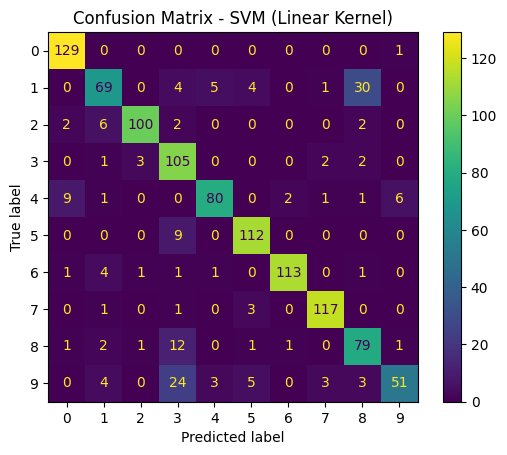

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

classifier = SVC(kernel = 'linear', random_state=10, max_iter=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("---------------------------------")
print("---------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap="viridis")   # use "viridis" colormap like your screenshot
plt.title("Confusion Matrix - SVM (Linear Kernel)")
plt.show()

# **MLP classifier**

In [13]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[128   0   0   0   0   1   0   0   1   0]
 [  0 110   0   1   0   0   1   0   1   0]
 [  0   0 110   1   0   0   1   0   0   0]
 [  0   0   2 109   0   0   0   1   0   1]
 [  0   1   0   0  96   0   1   0   0   2]
 [  0   0   1   2   0 116   0   1   1   0]
 [  0   0   1   0   0   0 121   0   0   0]
 [  0   2   0   0   0   1   0 119   0   0]
 [  0   1   1   0   0   2   1   0  90   3]
 [  0   1   0   0   1   1   0   0   1  89]]
---------------------------------
---------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       130
           1       0.96      0.97      0.96       113
           2       0.96      0.98      0.97       112
           3       0.96      0.96      0.96       113
           4       0.99      0.96      0.97       100
           5       0.96      0.96      0.96       121
           6       0.97      0.99      0.98       122
           7       0.98   

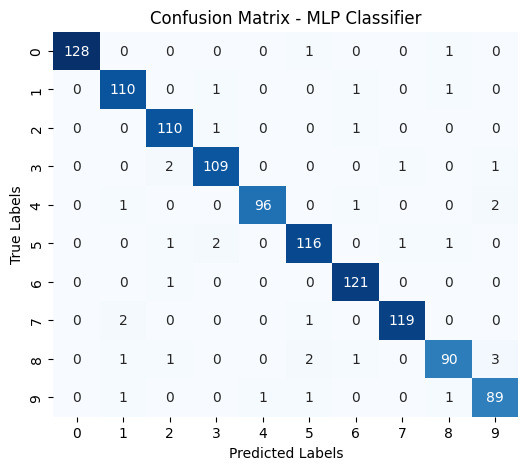

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("---------------------------------")
print("---------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - MLP Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[127   0   0   0   0   2   1   0   0   0]
 [  0 111   0   0   0   0   0   1   0   1]
 [  1   0 110   1   0   0   0   0   0   0]
 [  0   0   1 110   0   0   0   0   0   2]
 [  0   0   0   0  96   0   1   0   0   3]
 [  0   0   0   2   0 117   1   0   0   1]
 [  0   0   1   0   2   0 119   0   0   0]
 [  0   0   0   0   0   1   0 120   0   1]
 [  0   5   1   1   0   1   1   0  88   1]
 [  1   1   1   0   0   0   0   2   2  86]]
---------------------------------
---------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       130
           1       0.95      0.98      0.97       113
           2       0.96      0.98      0.97       112
           3       0.96      0.97      0.97       113
           4       0.98      0.96      0.97       100
           5       0.97      0.97      0.97       121
           6       0.97      0.98      0.97       122
           7       0.98   

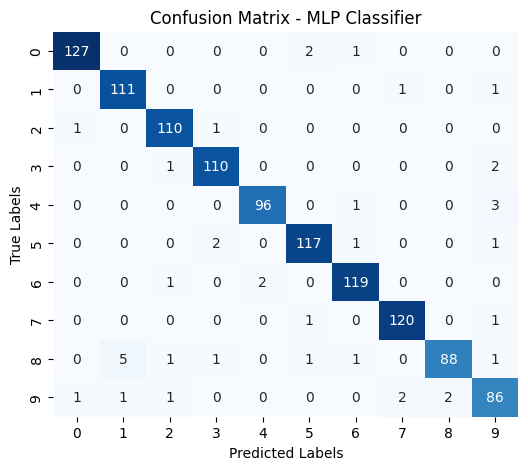

In [15]:
#Parameter Tuning for MLP
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=2000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("---------------------------------")
print("---------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - MLP Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# **Wine Dataset**

In [16]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Random Forest Classifier**

In [19]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 20, random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Confusion Matrix:
[[14  0  0]
 [ 2 13  1]
 [ 0  0  6]]
---------------------------------
---------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.81      0.90        16
           3       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.93      0.92      0.92        36

---------------------------------
---------------------------------
Accuracy:
0.9166666666666666


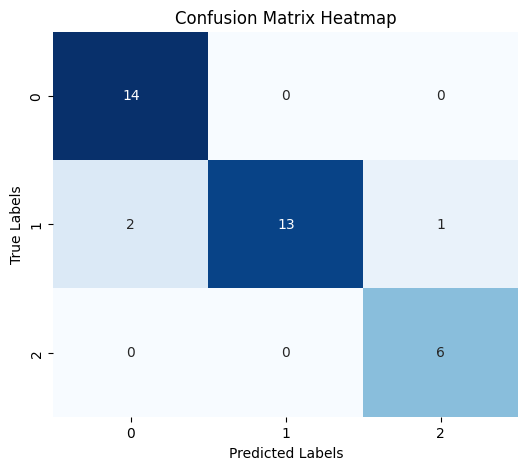

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("---------------------------------")
print("---------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

print("---------------------------------")
print("---------------------------------")

print("Accuracy:")
print(accuracy_score(y_test, y_pred))
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# **SVM**

In [21]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
---------------------------------
---------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



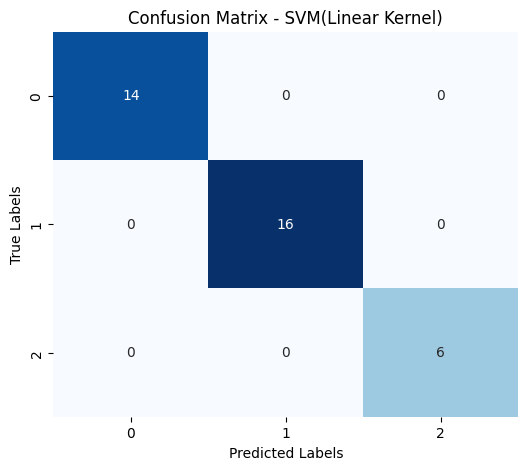

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("---------------------------------")
print("---------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM(Linear Kernel)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[13  1  0]
 [ 0 14  2]
 [ 0  0  6]]
---------------------------------
---------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.93      0.88      0.90        16
           3       0.75      1.00      0.86         6

    accuracy                           0.92        36
   macro avg       0.89      0.93      0.91        36
weighted avg       0.93      0.92      0.92        36



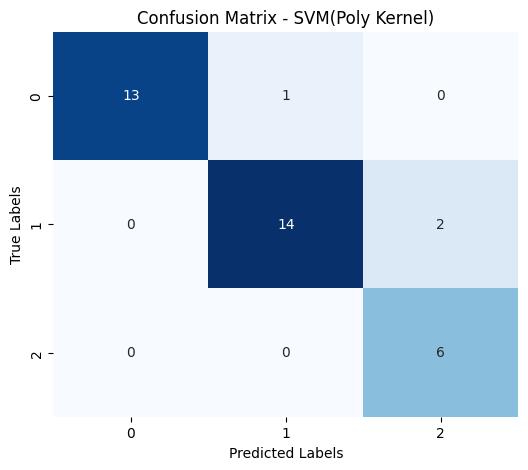

In [24]:
#Parameter tuning of SVM
from sklearn.svm import SVC

classifier = SVC(kernel = 'poly', degree=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("---------------------------------")
print("---------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM(Poly Kernel)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Confusion Matrix:
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
---------------------------------
---------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


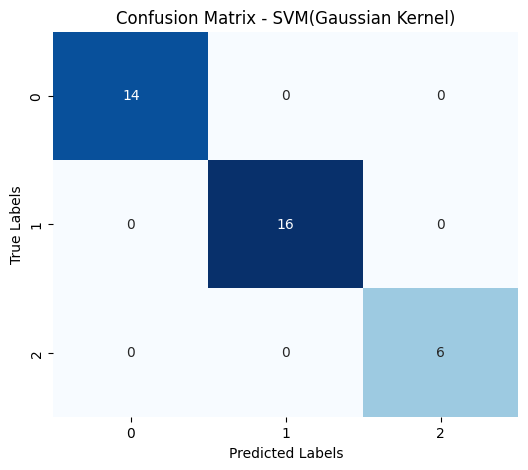

In [25]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf') #Gaussian Kernel
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("---------------------------------")
print("---------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM(Gaussian Kernel)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Confusion Matrix:
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]
---------------------------------
---------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16
           3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


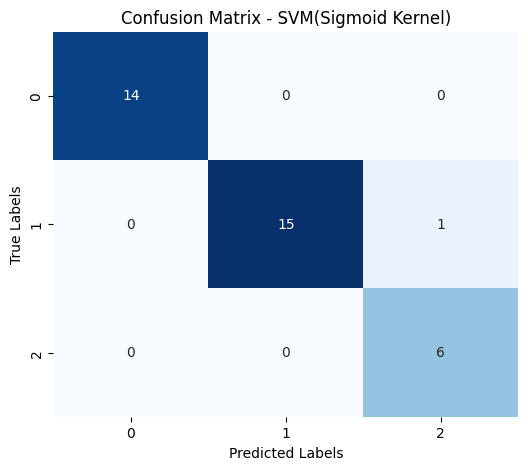

In [26]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'sigmoid') #Sigmoid Kernel
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("---------------------------------")
print("---------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - SVM(Sigmoid Kernel)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Confusion Matrix:
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
---------------------------------
---------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



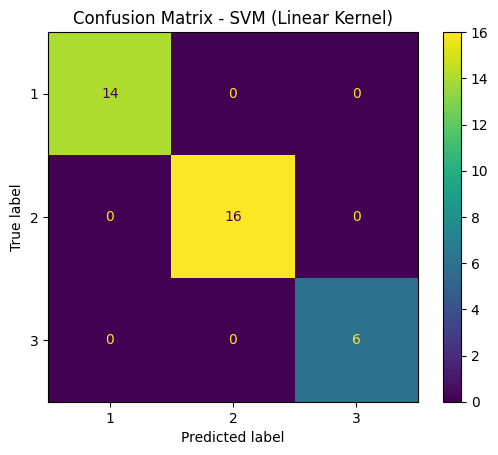

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

classifier = SVC(kernel = 'linear', random_state=10, max_iter=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("---------------------------------")
print("---------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap="viridis")
plt.title("Confusion Matrix - SVM (Linear Kernel)")
plt.show()

# **MLP**

In [28]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[14  0  0]
 [ 1 14  1]
 [ 0  0  6]]
---------------------------------
---------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93        16
           3       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36



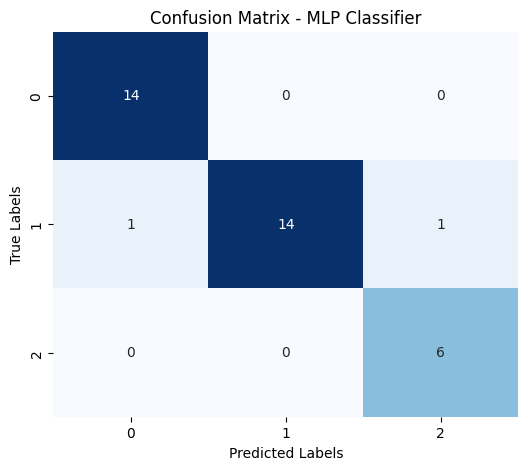

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("---------------------------------")
print("---------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - MLP Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix:
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]
---------------------------------
---------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



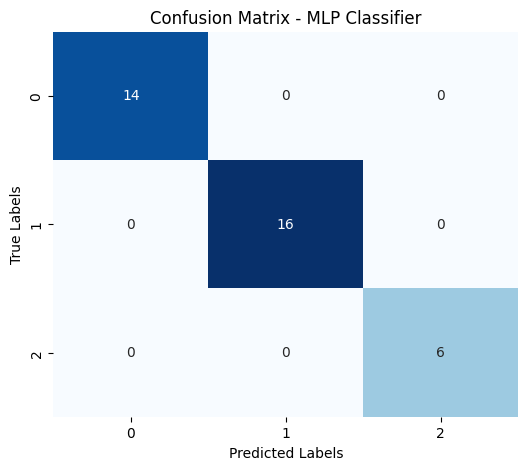

In [30]:
#Parameter Tuning for MLP
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=2000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("---------------------------------")
print("---------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - MLP Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# **ROC & AUC CURVES**

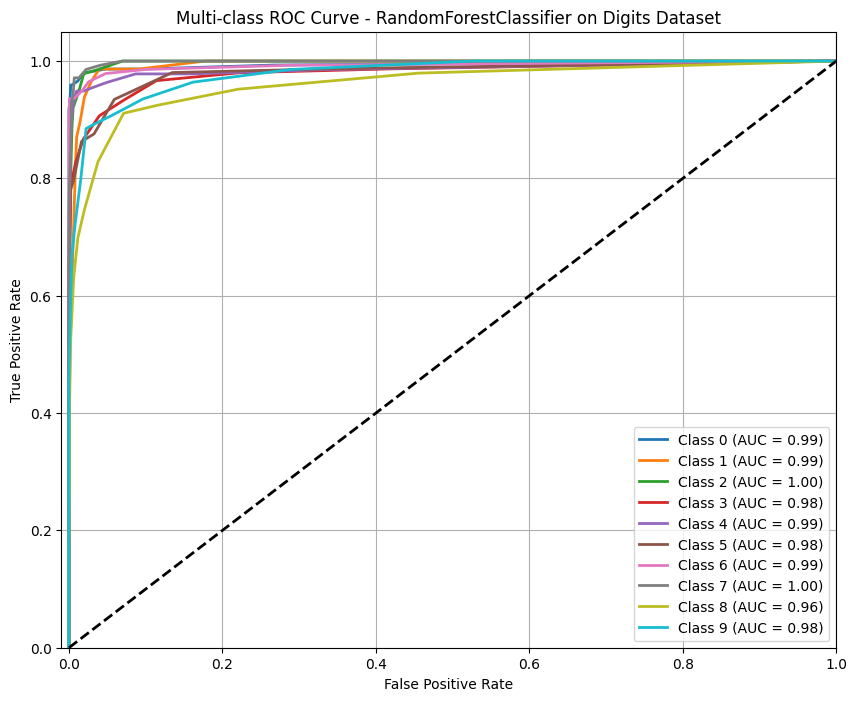

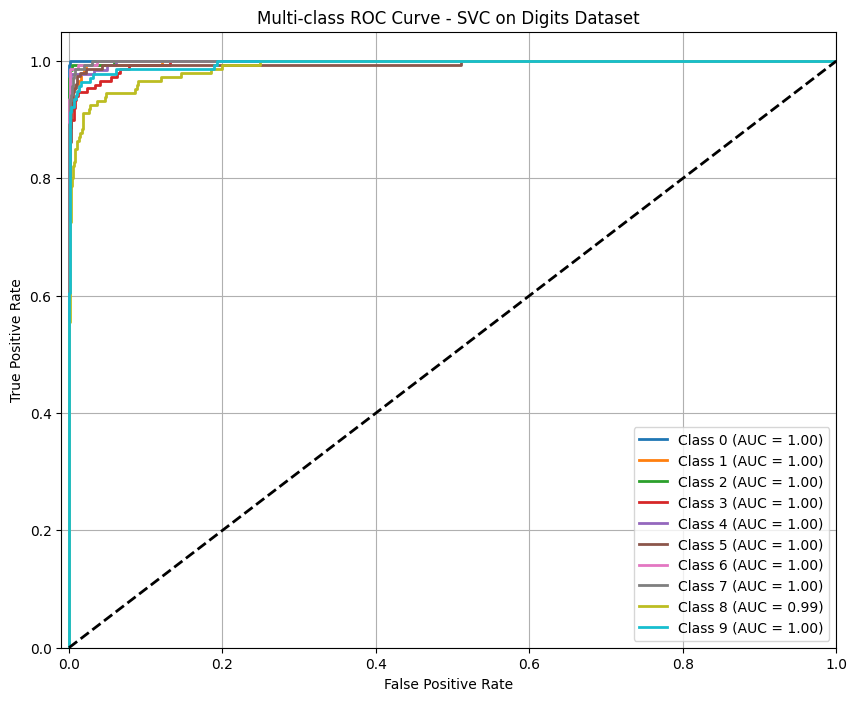

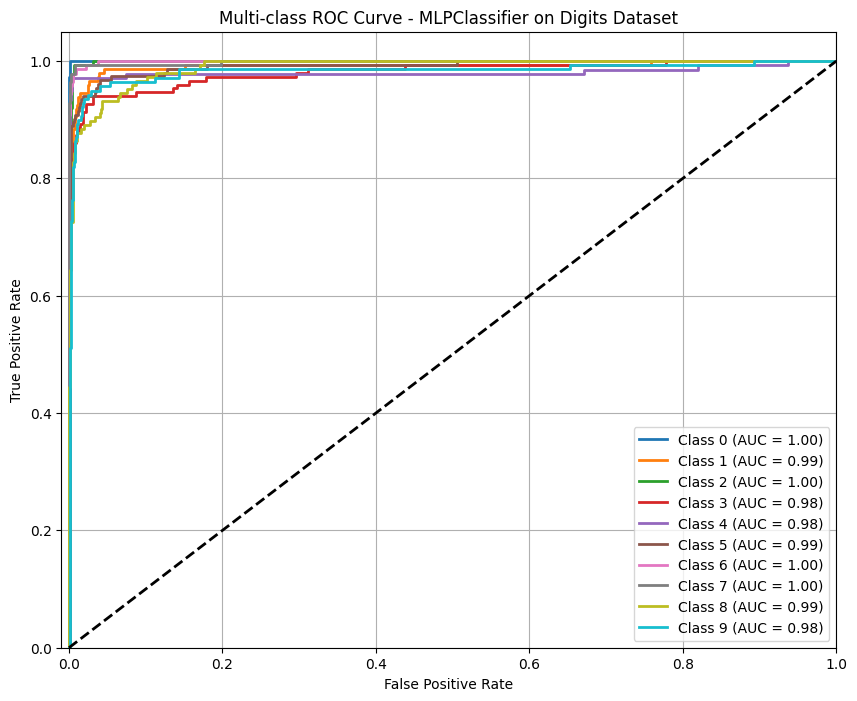

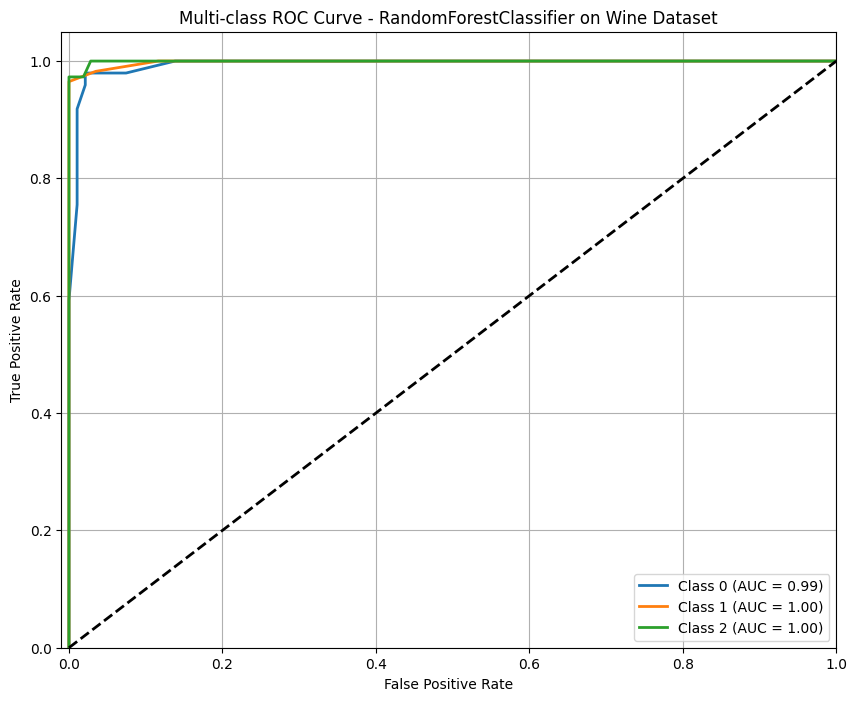

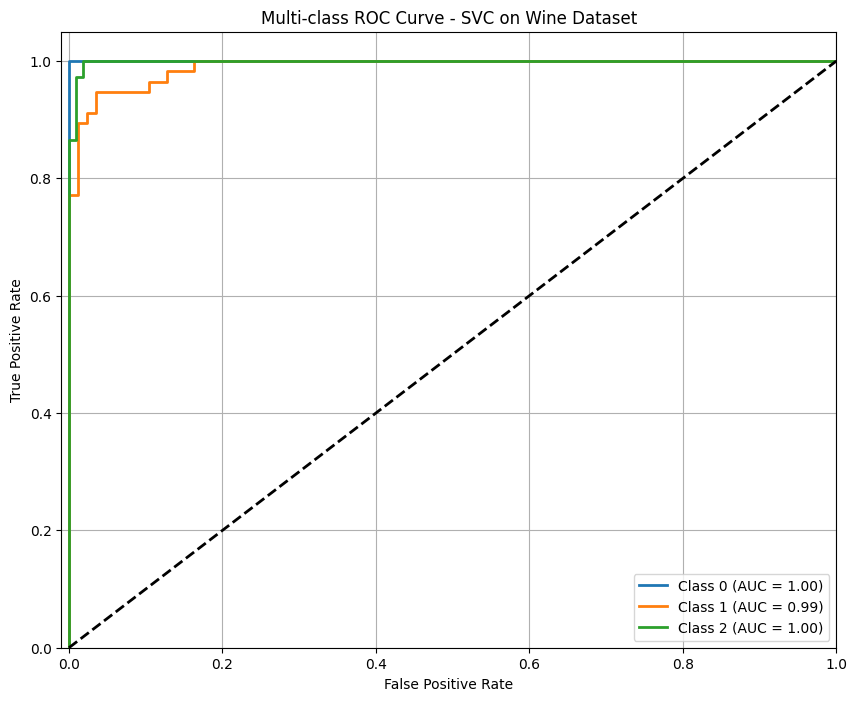

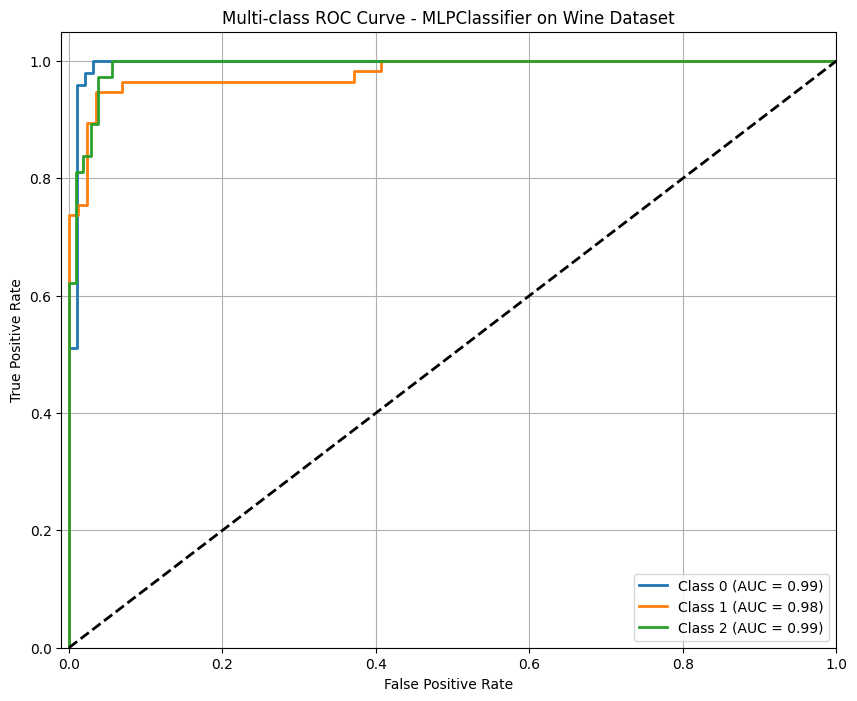

In [31]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

def plot_roc_for_classifier(X, y, classifier, title_suffix=""):
    classes = np.unique(y)
    y_bin = label_binarize(y, classes=classes)
    n_classes = y_bin.shape[1]

    X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.80, random_state=0)

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)

    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)
    elif hasattr(clf, "decision_function"):
        y_score = clf.decision_function(X_test)
    else:
        print(f"{classifier.__class__.__name__} does not support probability or decision scores.")
        return

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    colors = cycle(plt.cm.tab10.colors)

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multi-class ROC Curve - {classifier.__class__.__name__} {title_suffix}')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Load standard datasets
from sklearn.datasets import load_digits, load_wine
digits = load_digits()
wine = load_wine()

# Classifier list
classifiers = [
    RandomForestClassifier(n_estimators=20, random_state=0),
    SVC(probability=True, random_state=0),
    MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000, random_state=0)
]

# Dataset mapping
datasets = {
    "Digits Dataset": (digits.data, digits.target),
    "Wine Dataset": (wine.data, wine.target)
}

# Generate ROC plots for all classifiers on all datasets
for dataset_name, (X, y) in datasets.items():
    for clf in classifiers:
        plot_roc_for_classifier(X, y, clf, title_suffix=f"on {dataset_name}")


# **PCA**


=== PCA Classification on Digits Dataset (30 Components) ===


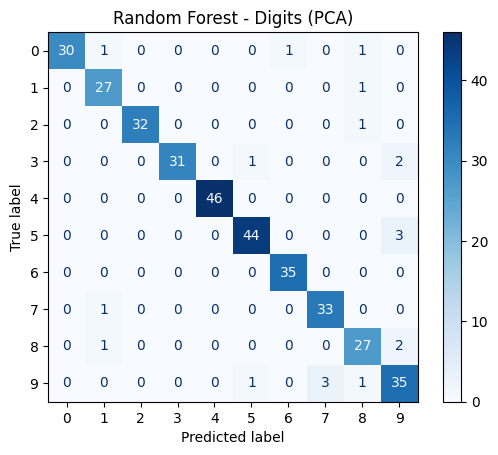

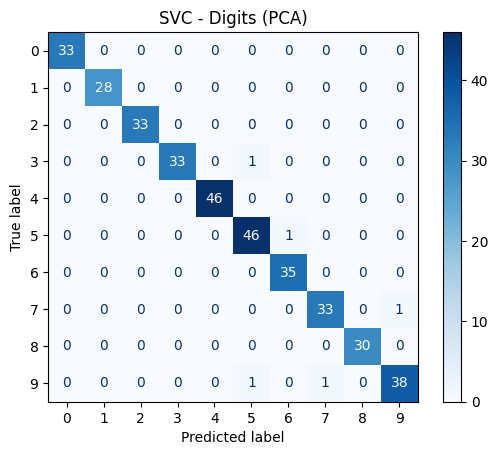

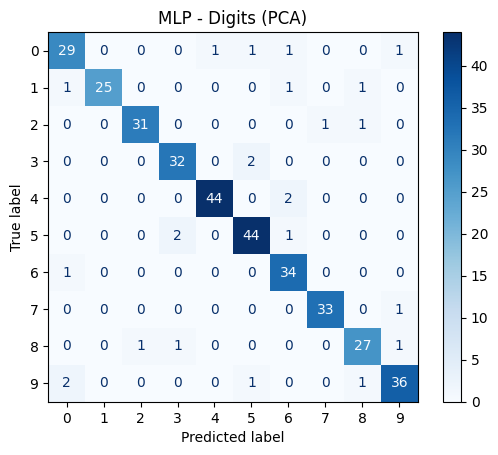


Performance Comparison on Digits Dataset (PCA 30D):


,Classifier,Accuracy,Precision,Recall,F1 Score
1,SVC,98.61,0.9876,0.9870,0.9872
0,Random Forest,94.44,0.9450,0.9437,0.9436
2,MLP,93.06,0.9322,0.9287,0.9298



=== PCA Classification on Wine Dataset (10 Components) ===


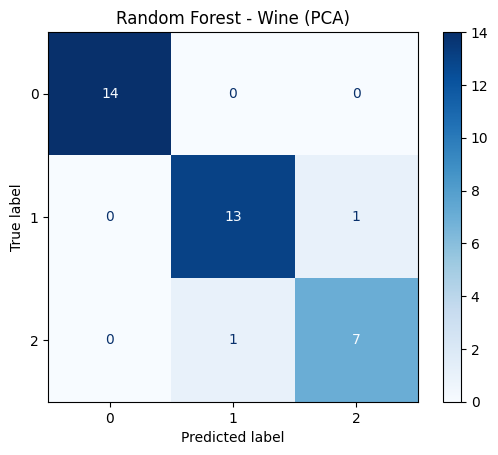

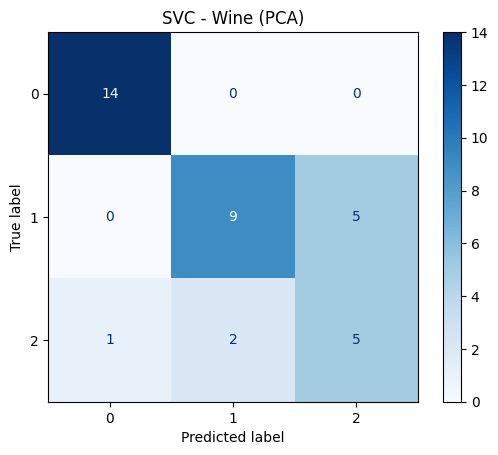

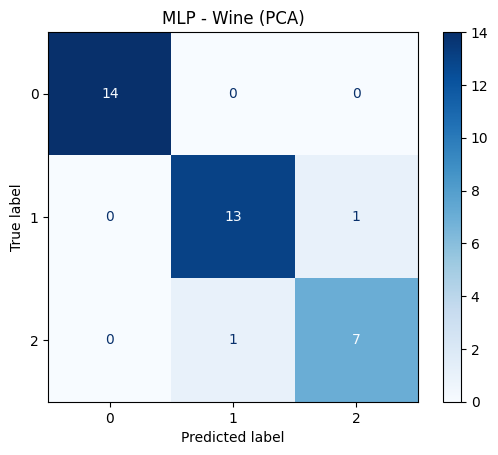


Performance Comparison on Wine Dataset (PCA 10D):


,Classifier,Accuracy,Precision,Recall,F1 Score
0,Random Forest,94.44,0.9345,0.9345,0.9345
2,MLP,94.44,0.9345,0.9345,0.9345
1,SVC,77.78,0.7505,0.7560,0.7470


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from IPython.display import display

def plot_conf_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=cmap, values_format='d')
    plt.title(title)
    plt.show()

def apply_pca_and_compare(X, y, dataset_name, n_components, classifiers):
    print(f"\n=== PCA Classification on {dataset_name} Dataset ({n_components} Components) ===")
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    results = []
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro')
        rec = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        cm = confusion_matrix(y_test, y_pred)
        results.append({
            "Classifier": name,
            "Accuracy": round(acc * 100, 2),
            "Precision": round(prec, 4),
            "Recall": round(rec, 4),
            "F1 Score": round(f1, 4)
        })
        plot_conf_matrix(cm, classes=np.unique(y), title=f"{name} - {dataset_name} (PCA)")
    df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
    print(f"\nPerformance Comparison on {dataset_name} Dataset (PCA {n_components}D):")
    display(df_results)

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=20, random_state=0),
    "SVC": SVC(kernel='rbf', probability=True, random_state=0),
    "MLP": MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=0)
}

from sklearn.datasets import load_digits, load_wine
digits = load_digits()
wine = load_wine()

apply_pca_and_compare(digits.data, digits.target, "Digits", n_components=30, classifiers=classifiers)
apply_pca_and_compare(wine.data, wine.target, "Wine", n_components=10, classifiers=classifiers)
